In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [13]:
df = pd.read_csv(r"C:\Users\sekha\Downloads\economic_index.csv")

In [15]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [28]:
df.drop(columns=['year','month'],axis=1,inplace=True)

In [30]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [32]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

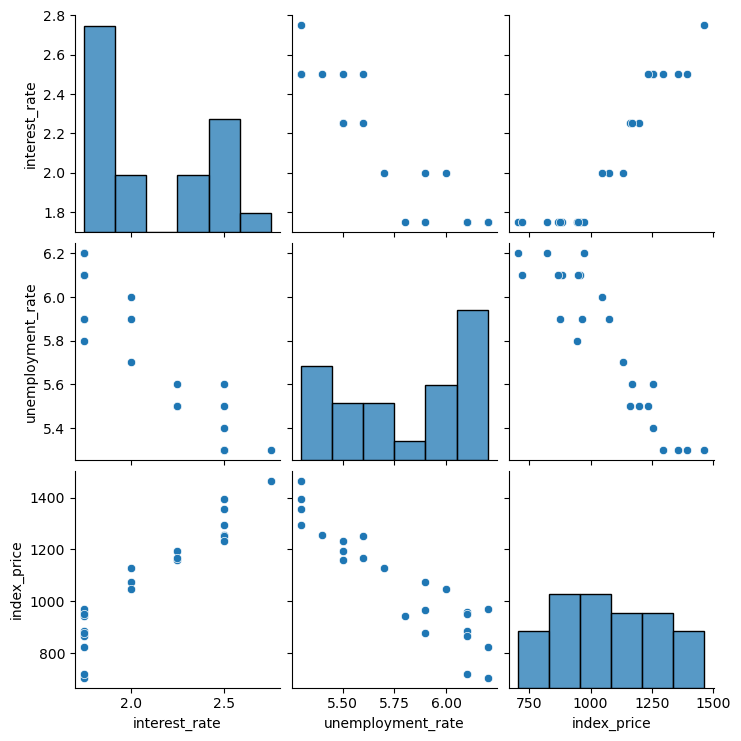

In [36]:
import seaborn as sns
sns.pairplot(df)

In [38]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

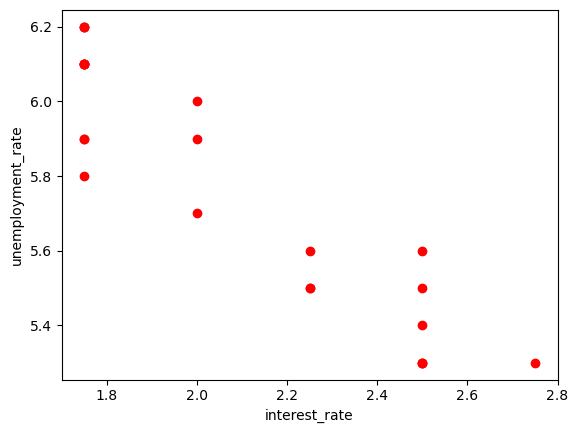

In [42]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [80]:
X=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [48]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [66]:
np.array(X)

array([[2.75, 5.3 ],
       [2.5 , 5.3 ],
       [2.5 , 5.3 ],
       [2.5 , 5.3 ],
       [2.5 , 5.4 ],
       [2.5 , 5.6 ],
       [2.5 , 5.5 ],
       [2.25, 5.5 ],
       [2.25, 5.5 ],
       [2.25, 5.6 ],
       [2.  , 5.7 ],
       [2.  , 5.9 ],
       [2.  , 6.  ],
       [1.75, 5.9 ],
       [1.75, 5.8 ],
       [1.75, 6.1 ],
       [1.75, 6.2 ],
       [1.75, 6.1 ],
       [1.75, 6.1 ],
       [1.75, 6.1 ],
       [1.75, 5.9 ],
       [1.75, 6.2 ],
       [1.75, 6.2 ],
       [1.75, 6.1 ]])

In [72]:
type(X)

pandas.core.frame.DataFrame

In [78]:
type(y)

pandas.core.frame.DataFrame

In [172]:
y_train

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

In [174]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

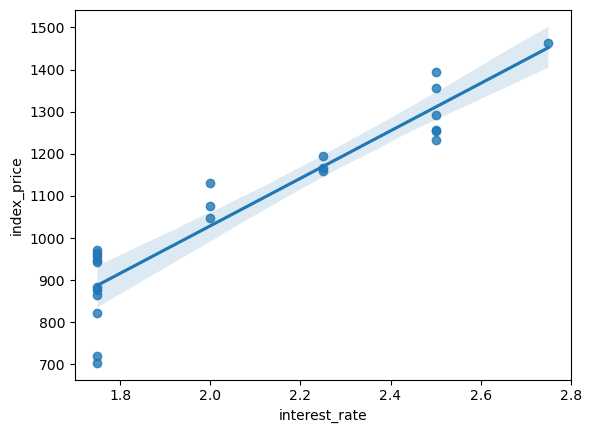

In [176]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

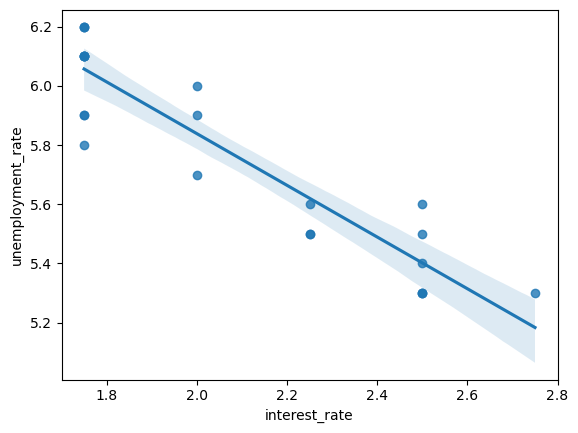

In [178]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

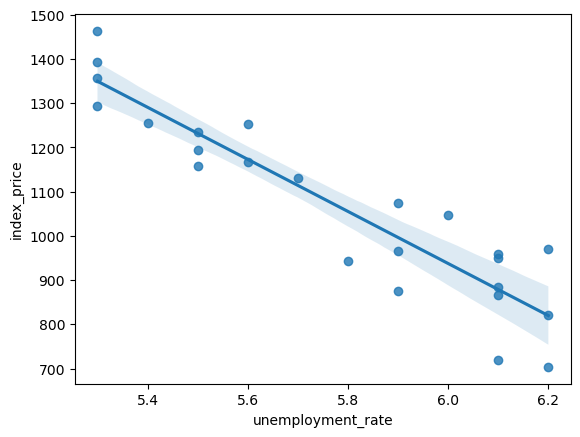

In [180]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

In [182]:
from sklearn.preprocessing import StandardScaler

In [184]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [186]:
from sklearn.linear_model import LinearRegression

In [188]:
regression=LinearRegression()

In [190]:
regression.fit(X_train,y_train)

LinearRegression()

In [192]:
#cross validation

from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3) 
### cv will divide the train data into parts based on cv value, coming to negative MSE, in sklearn it the models always consdier higher values is always better but we want minimum MSE ###

In [194]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [240]:
np.mean(validation_score)

-5914.828180162388

In [242]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [198]:
# Prediction
y_pred=regression.predict(X_test)

In [200]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [202]:
# Performance matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [204]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

59.935781523235526
5793.762887712579
76.11677139574812


In [206]:
# R square 
from sklearn.metrics import r2_score

In [208]:
r2=r2_score(y_test,y_pred)

In [210]:
r2

0.8278978091457142

In [212]:
n = len(y_test)          # Number of observations
p = 2    # Number of predictors (features)

adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

print("R² Score:", r2)
print("Adjusted R² Score:", adjusted_r2)

R² Score: 0.8278978091457142
Adjusted R² Score: 0.713163015242857


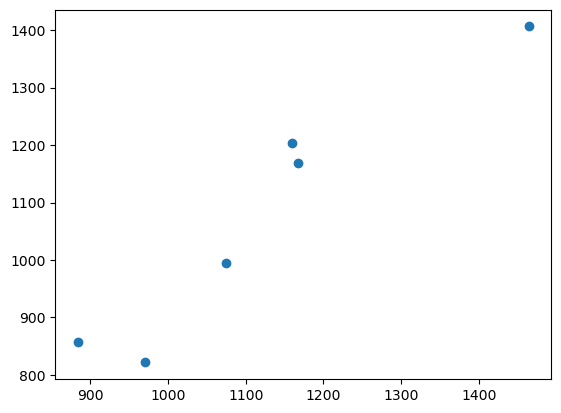

In [214]:
plt.scatter(y_test,y_pred)

In [216]:
resuiduals=y_test-y_pred
print(resuiduals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


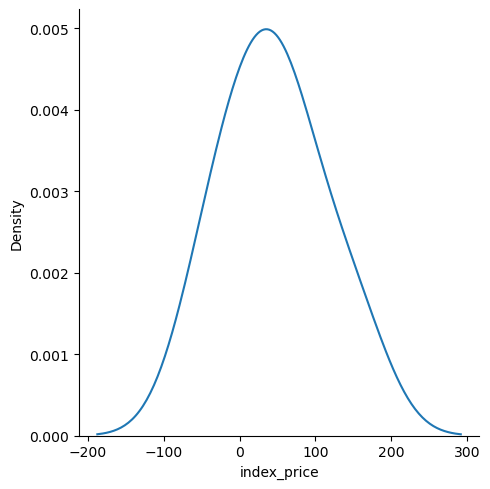

In [220]:
#plot for residuals
sns.displot(resuiduals,kind='kde')

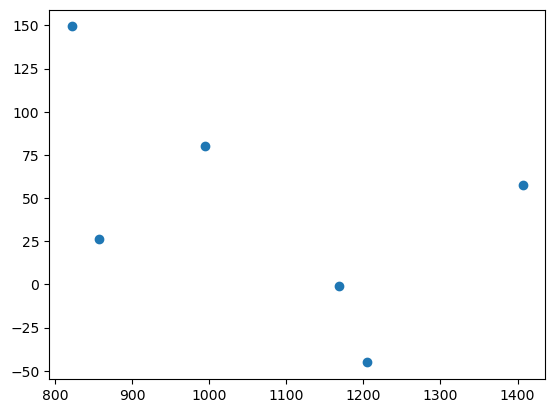

In [225]:
# scatter for residuals and predicted

plt.scatter(y_pred,resuiduals)

In [227]:
## for the above graph the data points are scatter randomly which is good

In [233]:
#summary

import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [235]:
model.summary()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 18 Jul 2025   Prob (F-statistic):                       0.754
Time:                        16:47:58   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""